In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv('data/humsavar_dbnsfp53_complete.csv')

After loading the data, let's peak at the features and some of their possible inputs

In [4]:
data.head()

,Gene,Entry,FTId,AA_change,Category,dbSNP,Disease,Label,chr,pos,ref,alt,rs_dbSNP,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,CADD_raw,CADD_phred,REVEL_score
0,ABCA4,P78363,VAR_084962,p.Phe2188Ser,LP/P,rs61750658,Stargardt disease 1 (STGD1) [MIM:248200],Pathogenic,1,93998027,A,G,rs61750658,0.049,D,0.765,P,4.435338,25.30,0.860
1,ABCA4,P78363,VAR_008491,p.Asp2177Asn,LB/B,rs1800555,Stargardt disease 1 (STGD1) [MIM:248200],Benign,1,93998061,C,G,rs1800555,0.053,T,0.975,D,2.412747,18.61,0.503
2,ABCA4,P78363,VAR_008491,p.Asp2177Asn,LB/B,rs1800555,Stargardt disease 1 (STGD1) [MIM:248200],Benign,1,93998061,C,T,rs1800555,0.268,T,0.061,B,1.492491,14.14,0.313
3,ABCA4,P78363,VAR_008490,p.Lys2160Arg,LP/P,rs281865405,Stargardt disease 1 (STGD1) [MIM:248200],Pathogenic,1,94000836,T,C,rs281865405,1.000,T,0.051,B,2.740497,20.10,0.577
4,ABCA4,P78363,VAR_008489,p.Cys2150Tyr,LP/P,rs61751384,Stargardt disease 1 (STGD1) [MIM:248200],Pathogenic,1,94000866,C,G,rs61751384,0.000,D,1.000,D,4.731917,26.50,0.937


In [5]:
data.describe()

,pos,SIFT_score,Polyphen2_HDIV_score,CADD_raw,CADD_phred,REVEL_score
count,1.094000e+04,10940.000000,10940.000000,10940.000000,10940.000000,10940.000000
mean,7.524832e+07,0.204477,0.525712,2.541573,17.087823,0.348958
std,5.653455e+07,0.309390,0.456486,2.107277,10.385512,0.345922
min,5.163600e+04,0.000000,0.000000,-4.124028,0.001000,0.000000
25%,3.315398e+07,0.001000,0.004000,0.753058,7.858500,0.062000
50%,5.664213e+07,0.036000,0.656500,2.551108,19.215000,0.173000
75%,1.113803e+08,0.279000,0.998000,4.493252,25.500000,0.683250
max,2.485740e+08,1.000000,1.000000,12.565050,58.000000,0.999000


In [27]:
data.isnull().values.any()

False

A lot of our data is categorical, but here we can see 3 continuous values. Variation_id is just a label, so we can drop it, but start_pos and end_pos could have some correlation with our target variable. We'll investigate that later.

We can also drop columns that have unique string values for every row (or just too many unique values), or for values that are reliant on the label and wouldn't normally be available.

In [22]:
data['AA_change'].describe()

count            10940
unique            6069
top       p.Leu1970Phe
freq                 9
Name: AA_change, dtype: object

In [23]:
data['dbSNP'].describe()

count          10940
unique          6203
top       rs80338792
freq              15
Name: dbSNP, dtype: object

In [24]:
data['FTId'].describe()

count          10940
unique          6338
top       VAR_008476
freq               9
Name: FTId, dtype: object

In [37]:
data['rs_dbSNP'].describe()

count          10940
unique          6203
top       rs80338792
freq              15
Name: rs_dbSNP, dtype: object

In [39]:
# drop the columns with too many unique values
data = data.drop(columns=['AA_change', 'dbSNP', 'FTId', 'rs_dbSNP'])
data.head()

,Gene,Entry,Category,Disease,Label,chr,pos,ref,alt,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,CADD_raw,CADD_phred,REVEL_score
0,ABCA4,P78363,LP/P,Stargardt disease 1 (STGD1) [MIM:248200],Pathogenic,1,93998027,A,G,0.049,D,0.765,P,4.435338,25.30,0.860
1,ABCA4,P78363,LB/B,Stargardt disease 1 (STGD1) [MIM:248200],Benign,1,93998061,C,G,0.053,T,0.975,D,2.412747,18.61,0.503
2,ABCA4,P78363,LB/B,Stargardt disease 1 (STGD1) [MIM:248200],Benign,1,93998061,C,T,0.268,T,0.061,B,1.492491,14.14,0.313
3,ABCA4,P78363,LP/P,Stargardt disease 1 (STGD1) [MIM:248200],Pathogenic,1,94000836,T,C,1.000,T,0.051,B,2.740497,20.10,0.577
4,ABCA4,P78363,LP/P,Stargardt disease 1 (STGD1) [MIM:248200],Pathogenic,1,94000866,C,G,0.000,D,1.000,D,4.731917,26.50,0.937


In [53]:
# drop the columns that are related to our label 
data = data.drop(columns=['Category', 'Label'])
data.head()

,Gene,Entry,Disease,chr,pos,ref,alt,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,CADD_raw,CADD_phred,REVEL_score,target_class
0,ABCA4,P78363,Stargardt disease 1 (STGD1) [MIM:248200],1,93998027,A,G,0.049,D,0.765,P,4.435338,25.30,0.860,1
1,ABCA4,P78363,Stargardt disease 1 (STGD1) [MIM:248200],1,93998061,C,G,0.053,T,0.975,D,2.412747,18.61,0.503,0
2,ABCA4,P78363,Stargardt disease 1 (STGD1) [MIM:248200],1,93998061,C,T,0.268,T,0.061,B,1.492491,14.14,0.313,0
3,ABCA4,P78363,Stargardt disease 1 (STGD1) [MIM:248200],1,94000836,T,C,1.000,T,0.051,B,2.740497,20.10,0.577,1
4,ABCA4,P78363,Stargardt disease 1 (STGD1) [MIM:248200],1,94000866,C,G,0.000,D,1.000,D,4.731917,26.50,0.937,1


# Target Value Distribution

<Axes: xlabel='Label', ylabel='count'>

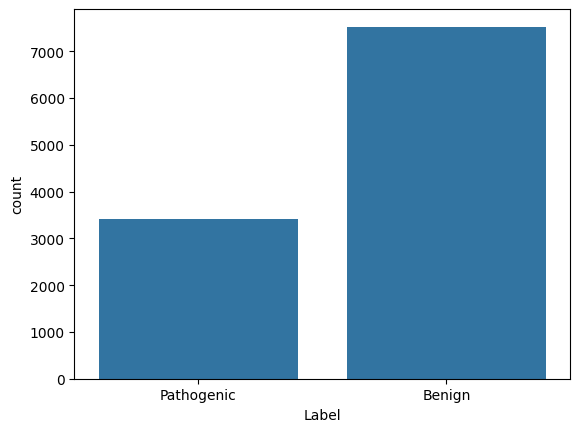

In [6]:
sns.countplot(x='Label', data=data)

<Axes: xlabel='Label', ylabel='proportion'>

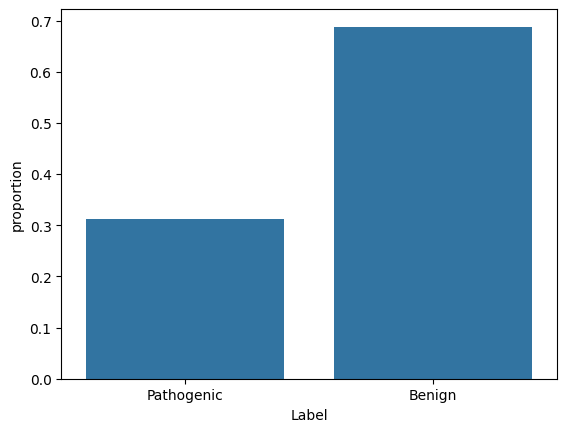

In [7]:
sns.countplot(x='Label', data=data, stat='proportion')

I'm going to turn these classes to zero and one to make it easier for me

In [43]:
classes = {'Benign': 0, 'Pathogenic': 1}
data['target_class'] = data['Label'].map(classes)
data.head()

,Gene,Entry,Category,Disease,Label,chr,pos,ref,alt,SIFT_score,SIFT_pred,Polyphen2_HDIV_score,Polyphen2_HDIV_pred,CADD_raw,CADD_phred,REVEL_score,target_class
0,ABCA4,P78363,LP/P,Stargardt disease 1 (STGD1) [MIM:248200],Pathogenic,1,93998027,A,G,0.049,D,0.765,P,4.435338,25.30,0.860,1
1,ABCA4,P78363,LB/B,Stargardt disease 1 (STGD1) [MIM:248200],Benign,1,93998061,C,G,0.053,T,0.975,D,2.412747,18.61,0.503,0
2,ABCA4,P78363,LB/B,Stargardt disease 1 (STGD1) [MIM:248200],Benign,1,93998061,C,T,0.268,T,0.061,B,1.492491,14.14,0.313,0
3,ABCA4,P78363,LP/P,Stargardt disease 1 (STGD1) [MIM:248200],Pathogenic,1,94000836,T,C,1.000,T,0.051,B,2.740497,20.10,0.577,1
4,ABCA4,P78363,LP/P,Stargardt disease 1 (STGD1) [MIM:248200],Pathogenic,1,94000866,C,G,0.000,D,1.000,D,4.731917,26.50,0.937,1


In [9]:
print(data['target_class'].value_counts())
print(data['target_class'].value_counts(normalize=True))

target_class
0    7526
1    3414
Name: count, dtype: int64
target_class
0    0.687934
1    0.312066
Name: proportion, dtype: float64


We have a slight skew in our target class, with about 2/3 of our data being benign. This means if we just predict this class, we can get ~68% accuracy. So, as a baseline, our goal should be to improve past this.

If the data skew affects our training, there are a couple of ways to balance this. For one, we can a heavy error on false negatives. That is, if a piece of data is pathogenic but we classify it as benign or likely benign, we add a larger error term to make up for the lack of data. That way our model still learns to classify these terms correctly. 

We should also look at metrics other than accuracy, such as the precision and recall for each class. A confusion matrix will also be very helpful in our case. Now on to more analysis!

# Correlation Analysis

#### Now, let's see how each of our features relates to the target class

## Position

<Axes: xlabel='pos'>

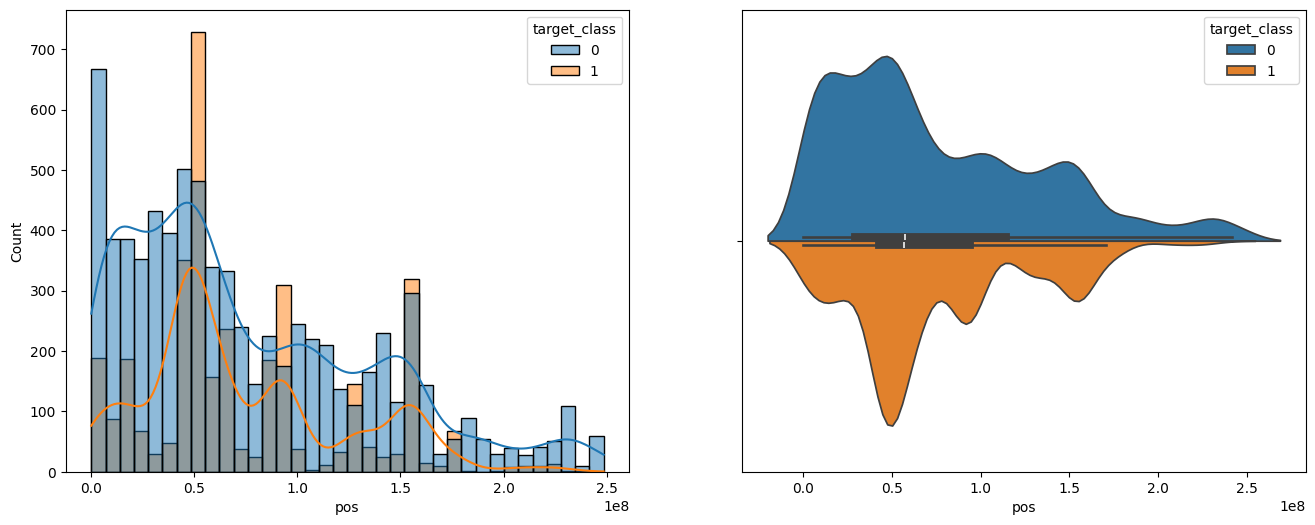

In [61]:
fig, axes = plt.subplots(1,2, figsize=(16,6))
sns.histplot(data=data, x='pos', hue='target_class', kde=True, ax=axes[0])
sns.violinplot(data=data, x='pos', hue='target_class', split=True, ax=axes[1])

The distribution of the gene's position is a bit different between classes, but I'm a bit concerned because the means are VERY similar. And, the general shape of the distribution with the bumps and dips are prety close, though there are more defined dips for our pathogenic class. There might be some predictive power here, but it's a little hard to be certain. Let's continue looking.

## Ref & Alt

<Axes: xlabel='ref', ylabel='proportion'>

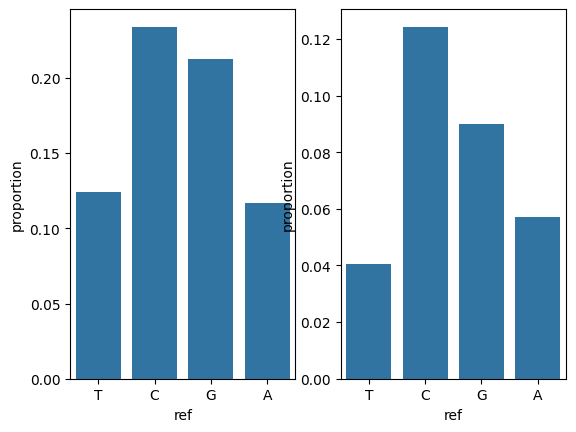

In [12]:
fig, axes=plt.subplots(1,2)
order = ('T','C','G','A')
sns.countplot(data=data.where(data['target_class'] == 0), x='ref', ax=axes[0], stat='proportion', order=order)
sns.countplot(data=data.where(data['target_class'] == 1), x='ref', ax=axes[1], stat='proportion', order=order)

<Axes: xlabel='alt', ylabel='proportion'>

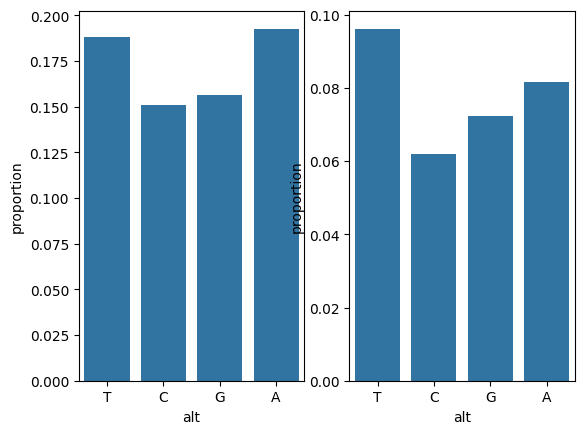

In [13]:
fig, axes=plt.subplots(1,2)
order = ('T','C','G','A')
sns.countplot(data=data.where(data['target_class'] == 0), x='alt', ax=axes[0], stat='proportion', order=order)
sns.countplot(data=data.where(data['target_class'] == 1), x='alt', ax=axes[1], stat='proportion', order=order)

The distribution, per class, of ref and alt looks somewhat similar so it might not be super indicative. Again we see slight differences in the distribution, but it doesn't stand out too distinctly. However, I am curious to see if together these two features have any kind of correlation. I'm going to make a new feature that is the pair of these two, and plot that to see the counts per class.

In [14]:
data['ref_alt_pair'] = data['ref'] + data['alt']
data['ref_alt_pair']

0        AG
1        CG
2        CT
3        TC
4        CG
         ..
10935    AG
10936    AT
10937    CA
10938    CG
10939    CT
Name: ref_alt_pair, Length: 10940, dtype: object

<Axes: xlabel='ref_alt_pair', ylabel='proportion'>

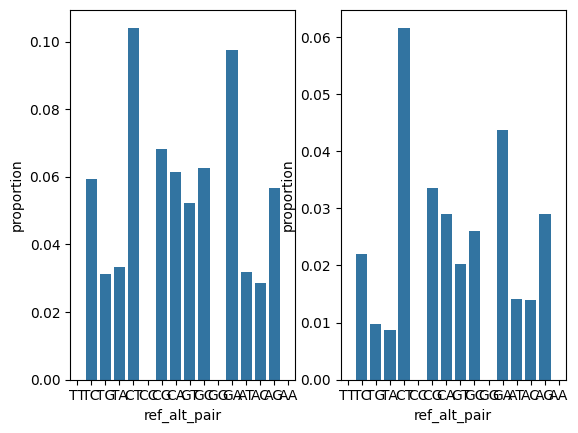

In [17]:
fig, axes=plt.subplots(1,2)
vals = ('T','C','G','A')
order = []
for ref in vals:
    for alt in vals:
        order.append(ref+alt)
sns.countplot(data=data.where(data['target_class'] == 0), x='ref_alt_pair', ax=axes[0], stat='proportion', order=order)
sns.countplot(data=data.where(data['target_class'] == 1), x='ref_alt_pair', ax=axes[1], stat='proportion', order=order)

<Axes: xlabel='ref_alt_pair'>

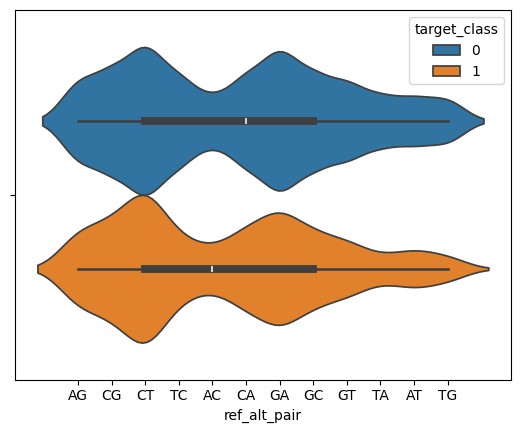

In [18]:
sns.violinplot(data=data, x='ref_alt_pair', hue='target_class')

Again, the distributions are VERY similar. There are some differences, and a different mode, but I'm a bit concerned that this is just noise and the underlying distributions are very similar. 

Now, the rest of the categorical data.

In [55]:
data.dtypes

Gene                     object
Entry                    object
Disease                  object
chr                      object
pos                       int64
ref                      object
alt                      object
SIFT_score              float64
SIFT_pred                object
Polyphen2_HDIV_score    float64
Polyphen2_HDIV_pred      object
CADD_raw                float64
CADD_phred              float64
REVEL_score             float64
target_class              int64
dtype: object

In [54]:
categorical = ['Gene', 'Entry', 'Disease', 'chr', 'SIFT_pred', 'Polyphen2_HDIV_pred']
data[categorical].nunique()

Gene                   1620
Entry                  1620
Disease                 399
chr                      23
SIFT_pred                 2
Polyphen2_HDIV_pred       3
dtype: int64

## Chromosome

<Axes: xlabel='chr'>

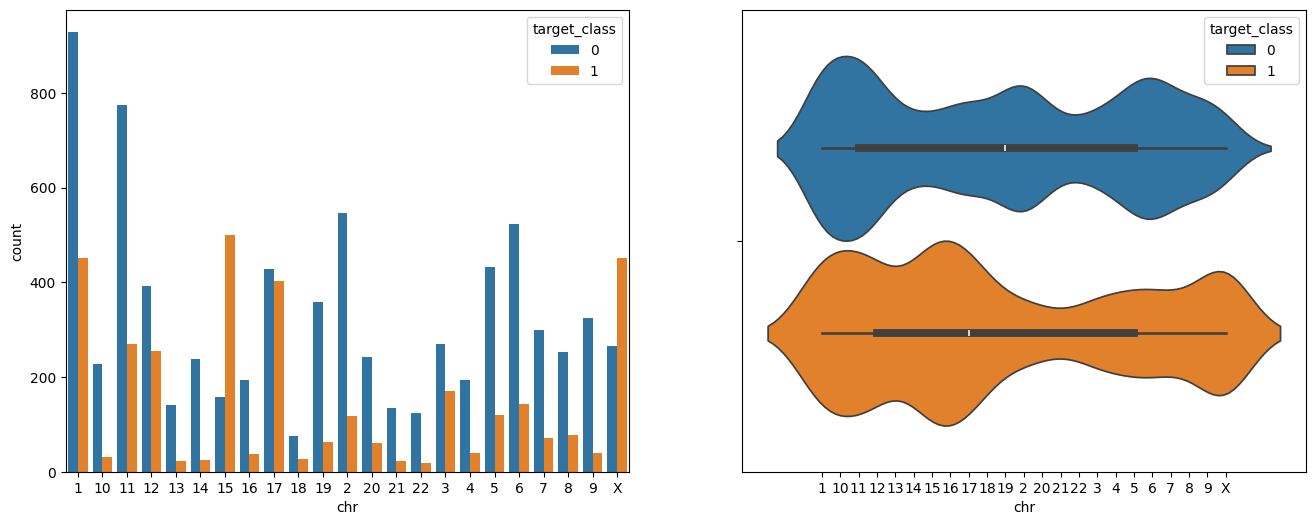

In [60]:
fig, axes = plt.subplots(1,2, figsize=(16,6))
sns.countplot(data=data, x='chr', hue='target_class', ax=axes[0])
sns.violinplot(data=data, x='chr', hue='target_class', ax=axes[1])

The distribution is different per class, which is great! This means the chromosome does have some significance on the pathogenic/benign nature. While it's not super pronounced, in conjunction with the other features, we might be able to get some strong predictive power.

## SIFT_pred

<Axes: xlabel='SIFT_pred', ylabel='count'>

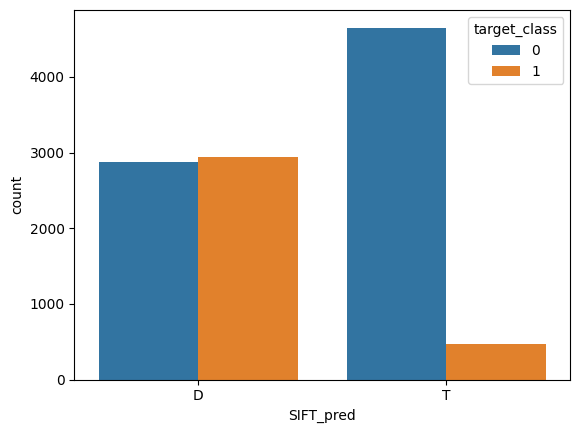

In [63]:
sns.countplot(data=data, x='SIFT_pred', hue='target_class')

Here we have a really interesting pattern. When SIFT_pred is D, it's evenly split between benign and pathogenetic. But, when SIFT_pred is 0, it's almost always benign. This can definitely be useful for our predictions.

## Polyphen2_HDIV_pred

<Axes: xlabel='Polyphen2_HDIV_pred', ylabel='count'>

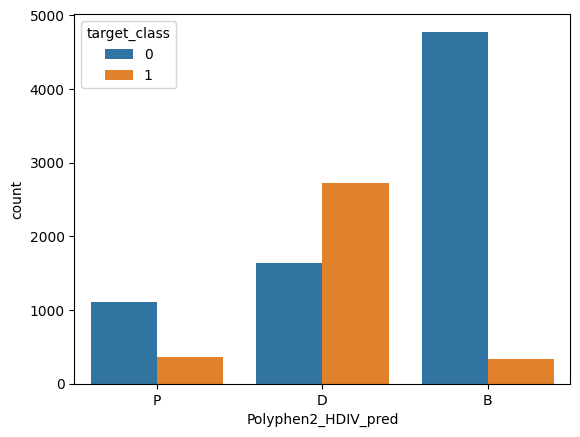

In [64]:
sns.countplot(data=data, x='Polyphen2_HDIV_pred', hue='target_class')

Another very useful feature. Each value has a different distribution of our target class, so we can definitely get a lot of information out of this.